In [ ]:
#group A: 

import pandas as pd
from matplotlib import pyplot as plt



In [ ]:
df = pd.read_csv("bank.csv")
df.head()

Shape of the data is:  (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      8
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
#encoding catagorical variables
from sklearn.preprocessing import LabelEncoder

def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df
          
df= Encoder(df)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45.0,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270.0,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476.0,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184.0,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1.0,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733.0,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29.0,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0.0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:
#feature scalling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
data_minmax = scaler.fit_transform(df)

scaler = StandardScaler()
data_std = scaler.fit_transform(df)

In [ ]:
x = df.drop('deposit',axis='columns')
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343.0,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45.0,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270.0,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476.0,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184.0,0,0,2,5,8,673,2,-1,0,3


In [ ]:
y = df.deposit
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC


svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy with full dataset:", acc)

Accuracy with full dataset: 0.7377857463021067


In [ ]:
svm.predict([[29,4,1,2,0,247,0,0,0,16,11,143,2,587,3,0]])

array([1])

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      1153
           1       0.79      0.63      0.70      1078

    accuracy                           0.74      2231
   macro avg       0.75      0.73      0.73      2231
weighted avg       0.75      0.74      0.73      2231



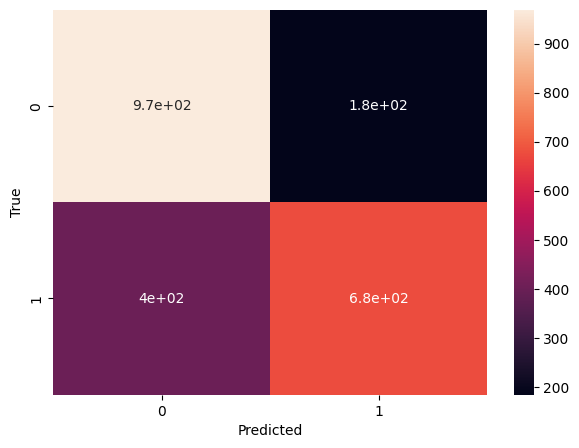

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))